In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV

In [2]:
os.chdir("C:/Users/S/Downloads/dataset")
print(os.getcwd())

C:\Users\S\Downloads\dataset


In [3]:
train = pd.read_csv("train_cab_fare.csv",na_values={"pickup_datetime":"43"})
test = pd.read_csv("test_cab_fare.csv")

In [4]:
train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [5]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [6]:
train.shape

(16067, 7)

In [7]:
test.shape

(9914, 6)

In [8]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [9]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

# Data preprocessing

In [10]:
#convert fare_amount object to numeric
train["fare_amount"]= pd.to_numeric(train["fare_amount"],errors="coerce")

In [11]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [12]:
train.dropna(subset= ["pickup_datetime"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [13]:
train["pickup_datetime"]= pd.to_datetime(train["pickup_datetime"],format= '%Y-%m-%d %H:%M:%S UTC')

In [14]:
train['year'] =train["pickup_datetime"].dt.year
train['month']=train["pickup_datetime"].dt.month
train['date']=train["pickup_datetime"].dt.day
train['day']=train["pickup_datetime"].dt.dayofweek
train['hour']=train["pickup_datetime"].dt.hour
train['Minute']=train["pickup_datetime"].dt.minute

In [15]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
month                       float64
date                        float64
day                         float64
hour                        float64
Minute                      float64
dtype: object

In [16]:
test["pickup_datetime"]= pd.to_datetime(test["pickup_datetime"],format= '%Y-%m-%d %H:%M:%S UTC')

In [17]:
test['year'] =test["pickup_datetime"].dt.year
test['month']=test["pickup_datetime"].dt.month
test['date']=test["pickup_datetime"].dt.day
test['day']=test["pickup_datetime"].dt.dayofweek
test['hour']=test["pickup_datetime"].dt.hour
test['Minute']=test["pickup_datetime"].dt.minute

In [18]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int32
month                         int32
date                          int32
day                           int32
hour                          int32
Minute                        int32
dtype: object

In [19]:
train =train.drop(train[train["pickup_datetime"].isnull()].index,axis=0)
print(train["pickup_datetime"].isnull().sum())

0


In [20]:
train["passenger_count"].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [21]:
train =train.drop(train[train["passenger_count"]>6].index,axis=0)

In [22]:
train =train.drop(train[train["passenger_count"]<0.99].index,axis=0)

In [23]:
train["passenger_count"].describe()

count    15933.000000
mean         1.649677
std          1.265925
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [24]:
train =train.drop(train[train["passenger_count"].isnull()].index,axis=0)
print(train["passenger_count"].isnull().sum())

0


In [25]:
train["fare_amount"].sort_values(ascending= False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [26]:

train =train.drop(train[train["fare_amount"]<0].index,axis=0)

In [27]:
train =train.drop(train[train["fare_amount"]>500].index,axis=0)

In [28]:
train.shape

(15928, 13)

In [29]:
train =train.drop(train[train["passenger_count"].isnull()].index,axis=0)
print(train["passenger_count"].isnull().sum())

0


In [30]:
#we need to drop all latitude less than -90 and greater than 90
train[train["pickup_latitude"]<-90]
train[train["pickup_latitude"]>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [31]:
train =train.drop(train[train["pickup_latitude"]<-90].index,axis=0)
train =train.drop(train[train["pickup_latitude"]>90].index,axis=0)

In [32]:
test =test.drop(test[test["pickup_latitude"]<-90].index,axis=0)
test =test.drop(test[test["pickup_latitude"]>90].index,axis=0)

In [33]:
train[train["pickup_latitude"]<-180]
train[train["pickup_latitude"]>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,Minute


In [34]:
train =train.drop(train[train["pickup_latitude"]<-180].index,axis=0)
train =train.drop(train[train["pickup_latitude"]>180].index,axis=0)

In [35]:
test =test.drop(test[test["pickup_latitude"]<-180].index,axis=0)
test =test.drop(test[test["pickup_latitude"]>180].index,axis=0)

In [36]:
train.shape

(15927, 13)

In [37]:
from math import radians,sin,cos,asin,sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    
    lon1,lat1,lon2,lat2=map(radians,[lon1,lat1,lon2,lat2])
    
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=sin(dlat/2)**2+cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c=2*asin(sqrt(a))
    km=6371*c
    return km

In [38]:
train["distance"]=train[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]].apply(haversine,axis=1)

In [39]:
test["distance"]=train[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]].apply(haversine,axis=1)

In [40]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [41]:
train["distance"].describe()

count    15927.000000
mean        15.051837
std        311.488027
min          0.000000
25%          1.214825
50%          2.125945
75%          3.850299
max       8667.542104
Name: distance, dtype: float64

In [42]:
train =train.drop(train[train["distance"]== 0].index,axis=0)

In [43]:
test =test.drop(test[test["distance"]== 0].index,axis=0)

In [44]:
train =train.drop(train[train["distance"]>130].index,axis=0)

In [45]:
test =test.drop(test[test["distance"]>130].index,axis=0)

In [46]:
train["distance"].describe()

count    15448.000000
mean         3.442293
std          4.595593
min          0.000111
25%          1.276583
50%          2.191322
75%          3.934646
max        129.950482
Name: distance, dtype: float64

In [47]:
train.shape

(15448, 14)

In [48]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [49]:
train["day"].describe()

count    15448.000000
mean         3.034956
std          1.969587
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: day, dtype: float64

In [50]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
month                       float64
date                        float64
day                         float64
hour                        float64
Minute                      float64
distance                    float64
dtype: object

In [51]:
train =train.drop(train[train["passenger_count"].isnull()].index,axis=0)
print(train["passenger_count"].isnull().sum())

0


In [52]:
train =train.drop(train[train["fare_amount"].isnull()].index,axis=0)
print(train["fare_amount"].isnull().sum())

0


In [53]:
test =test.drop(test[test["passenger_count"].isnull()].index,axis=0)
print(test["passenger_count"].isnull().sum())

0


In [54]:
test =test.drop(test[test["distance"].isnull()].index,axis=0)
print(test["distance"].isnull().sum())

0


In [55]:
test['year'] =test["year"].astype('int64')
test['month']=test["month"].astype('int64')
test['date']=test["date"].astype('int64')
test['day']=test["day"].astype('int64')
test['hour']=test["hour"].astype('int64')
test['passenger_count']=test["passenger_count"].astype('int64')

In [56]:
test.shape

(9509, 13)

In [57]:
train.shape

(15426, 14)

In [58]:
train['year'] =train["year"].astype('int64')
train['month']=train["month"].astype('int64')
train['date']=train["date"].astype('int64')
train['day']=train["day"].astype('int64')
train['hour']=train["hour"].astype('int64')
train['passenger_count']=train["passenger_count"].astype('int64')

In [59]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
month                         int64
date                          int64
day                           int64
hour                          int64
Minute                        int32
distance                    float64
dtype: object

In [60]:
drop_columns=["pickup_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","Minute"]
test=test.drop(drop_columns,axis=1)

In [61]:
test.dtypes

passenger_count      int64
year                 int64
month                int64
date                 int64
day                  int64
hour                 int64
distance           float64
dtype: object

In [62]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
month                         int64
date                          int64
day                           int64
hour                          int64
Minute                      float64
distance                    float64
dtype: object

In [63]:
drop_columns=["pickup_datetime"]
train=train.drop(drop_columns,axis=1)

In [64]:
train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
month                  int64
date                   int64
day                    int64
hour                   int64
Minute               float64
distance             float64
dtype: object

In [65]:
drop_columns=["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","Minute"]
train=train.drop(drop_columns,axis=1)

In [66]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
month                int64
date                 int64
day                  int64
hour                 int64
distance           float64
dtype: object

# data visualization

Text(0.5, 1.0, 'Number of passengers')

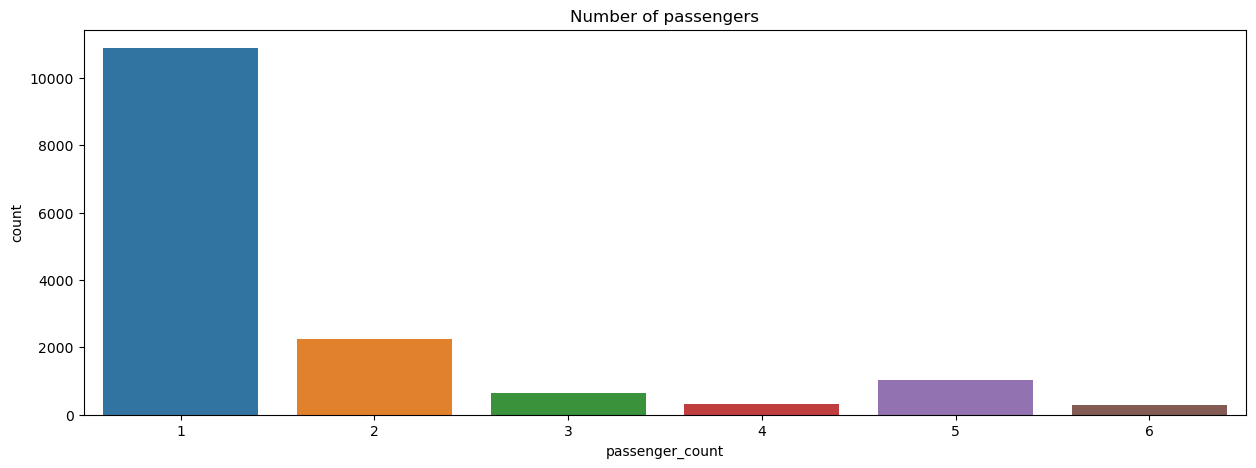

In [126]:
plt.figure(figsize=(15,5))
sns.countplot(x="passenger_count",data=train)
plt.title("Number of passengers")

<function matplotlib.pyplot.show(close=None, block=None)>

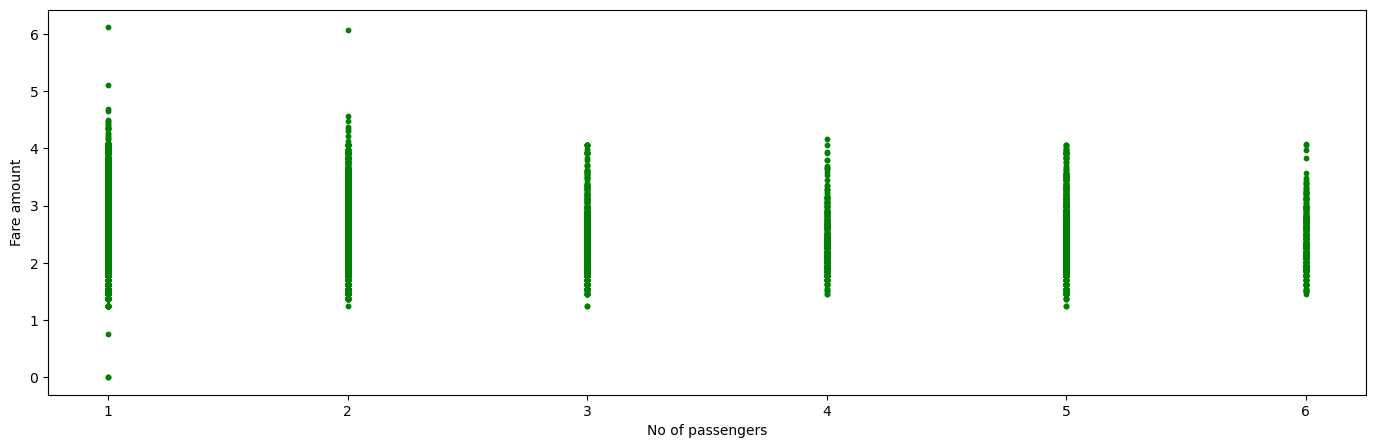

In [130]:
plt.figure(figsize=(17,5))
plt.scatter(x=train["passenger_count"],y=train["fare_amount"],s=10,color="green")
plt.xlabel("No of passengers")
plt.ylabel("Fare amount")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

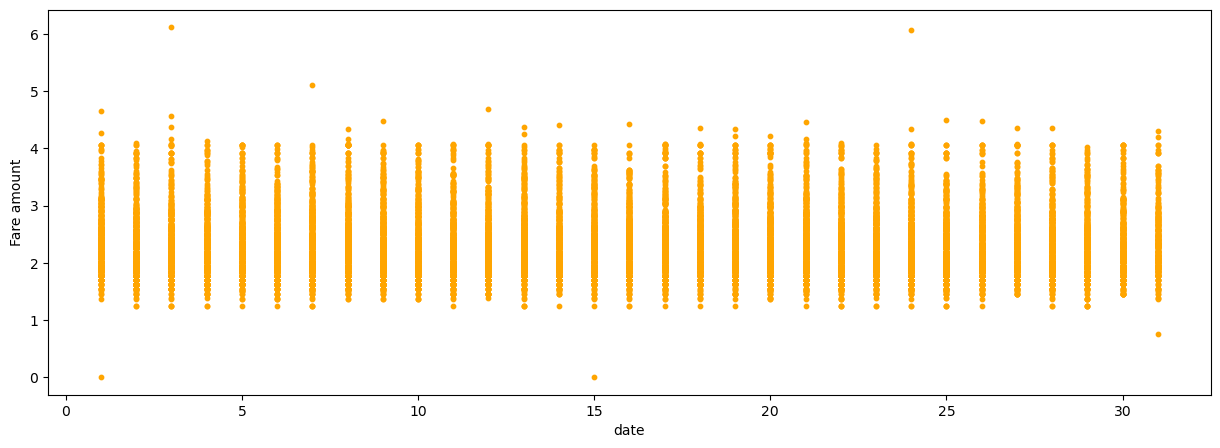

In [131]:
plt.figure(figsize=(15,5))
plt.scatter(x=train["date"],y=train["fare_amount"],s=10,color="orange")
plt.xlabel("date")
plt.ylabel("Fare amount")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

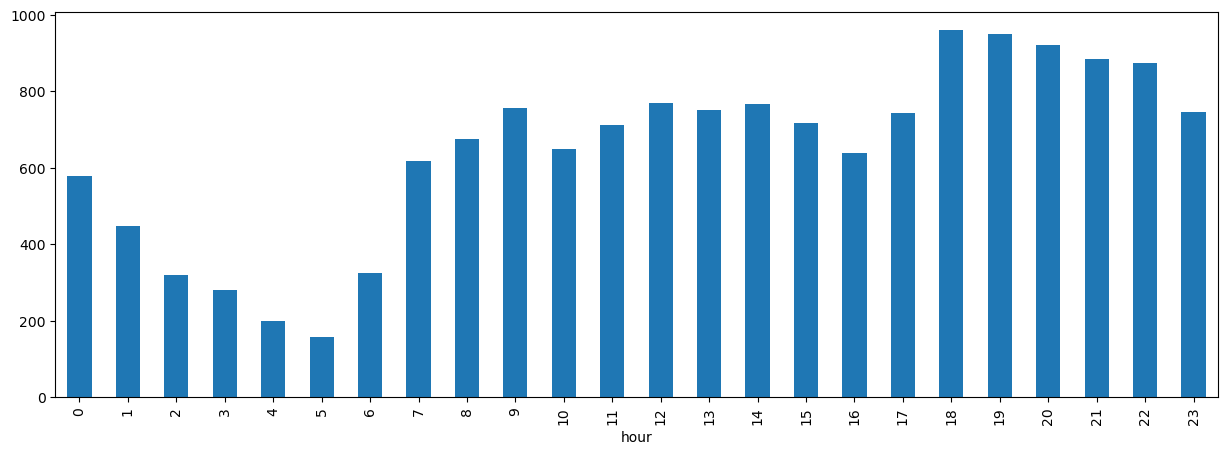

In [70]:
plt.figure(figsize=(15,5))
train.groupby(train["hour"])["hour"].count().plot(kind="bar")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

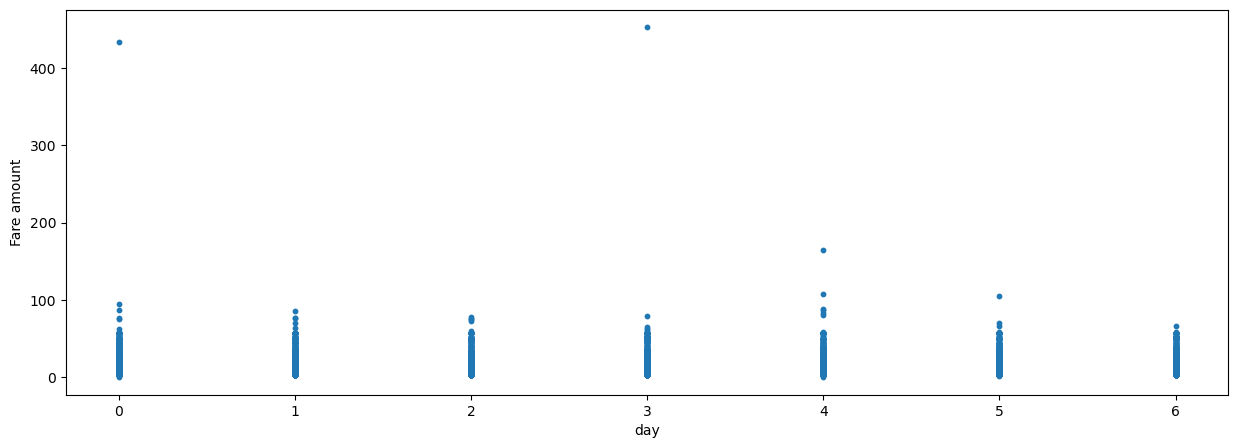

In [71]:
plt.figure(figsize=(15,5))
plt.scatter(x=train["day"],y=train["fare_amount"],s=10)
plt.xlabel("day")
plt.ylabel("Fare amount")
plt.show


<Axes: xlabel='day', ylabel='count'>

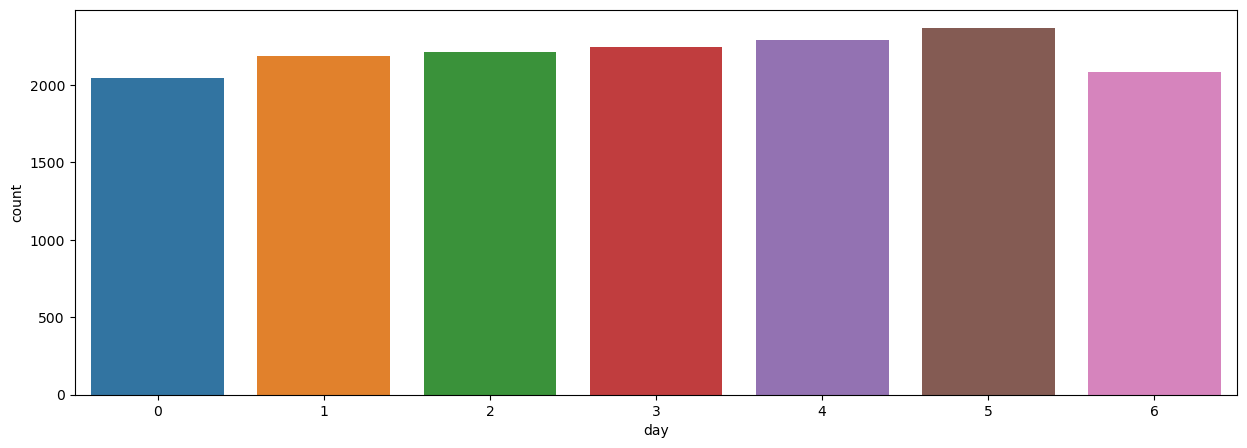

In [72]:
plt.figure(figsize=(15,5))
sns.countplot(x="day",data=train)

<function matplotlib.pyplot.show(close=None, block=None)>

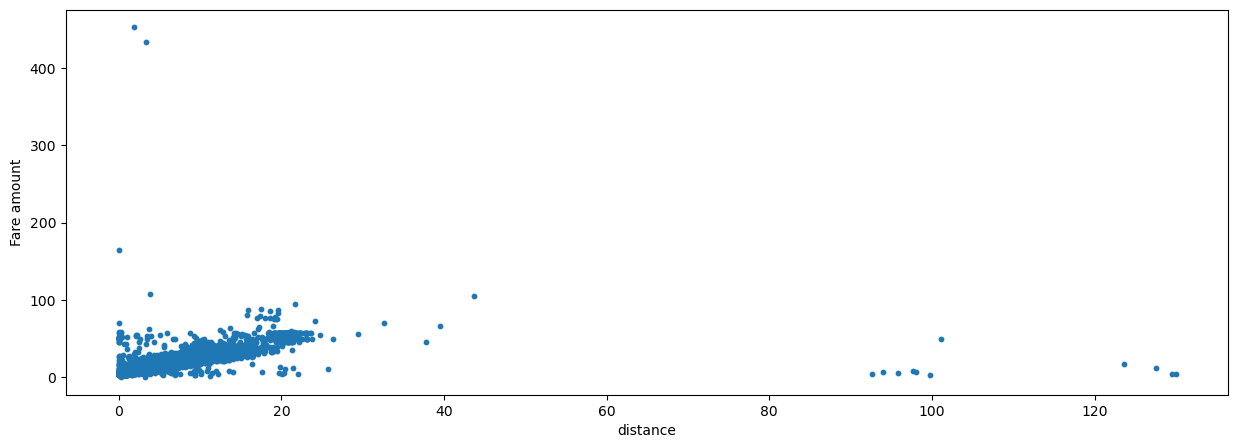

In [73]:
plt.figure(figsize=(15,5))
plt.scatter(x=train["distance"],y=train["fare_amount"],s=10)
plt.xlabel("distance")
plt.ylabel("Fare amount")
plt.show


# Feature scaling

fare_amount


C:\Users\S\AppData\Local\Temp\ipykernel_7540\1875168939.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins="auto",color="green")


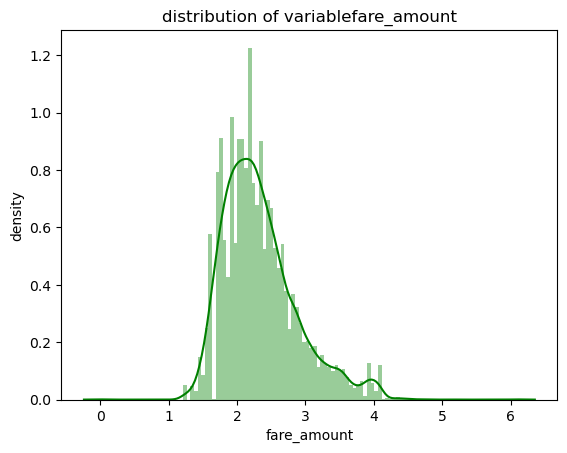

distance


C:\Users\S\AppData\Local\Temp\ipykernel_7540\1875168939.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins="auto",color="green")


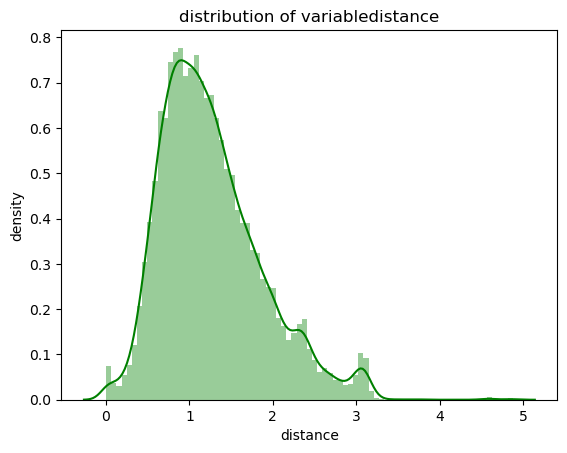

In [132]:
#normalizing the dataset
for i in ["fare_amount","distance"]:
    print(i)
    sns.distplot(train[i],bins="auto",color="green")
    plt.title("distribution of variable"+i)
    plt.ylabel("density")
    plt.show()

In [75]:
train["fare_amount"]=np.log1p(train["fare_amount"])
train["distance"]=np.log1p(train["distance"])

fare_amount


C:\Users\S\AppData\Local\Temp\ipykernel_7540\499007908.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins="auto",color="green")


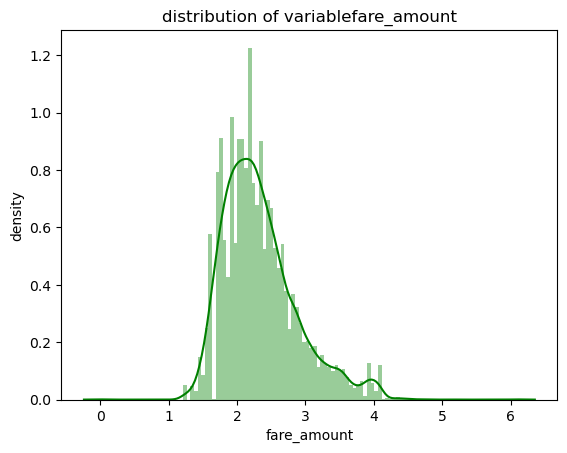

distance


C:\Users\S\AppData\Local\Temp\ipykernel_7540\499007908.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins="auto",color="green")


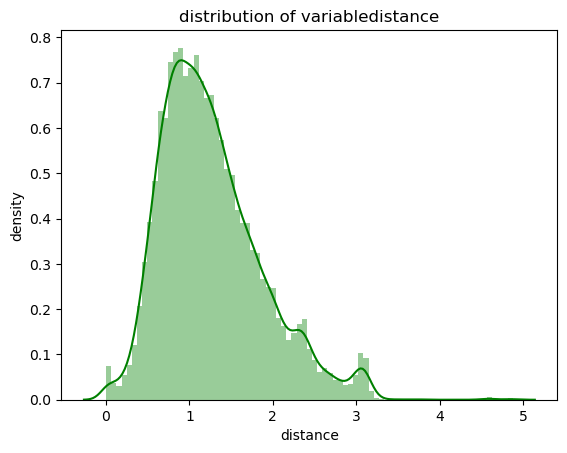

In [76]:
for i in ["fare_amount","distance"]:
    print(i)
    sns.distplot(train[i],bins="auto",color="green")
    plt.title("distribution of variable"+i)
    plt.ylabel("density")
    plt.show()

as we can see the data is in bell shape so it is normalized

# Applying ML alogorithms

In [77]:
x_train,x_test,y_train,y_test=train_test_split(train.iloc[:,train.columns !="fare_amount"],train.iloc[:,0],test_size=0.20,random_state=1)

In [78]:
x_train

,passenger_count,year,month,date,day,hour,distance
13018,1,2014,7,11,4,10,0.828231
12950,3,2009,6,27,5,17,0.980620
14009,1,2009,6,12,4,15,0.534072
2815,1,2012,11,26,0,7,0.911806
402,1,2012,3,7,2,11,0.781107
...,...,...,...,...,...,...,...
994,1,2009,3,24,1,11,1.465260
5453,1,2012,11,26,0,11,0.754172
12680,1,2014,3,8,5,15,1.394952
259,1,2013,5,2,3,3,0.803939


In [79]:
x_train.shape

(12340, 7)

In [80]:
print(x_train.shape)
print(x_test.shape)

(12340, 7)
(3086, 7)


In [81]:
y_train

13018    2.014903
12950    2.014903
14009    1.629241
2815     2.079442
402      1.902108
           ...   
994      2.687847
5453     2.639057
12680    3.020425
259      1.945910
13917    2.484907
Name: fare_amount, Length: 12340, dtype: float64

In [82]:
x_test.shape

(3086, 7)

In [83]:
y_test

1950     1.960095
8718     3.780319
14900    2.442347
9042     1.960095
4519     2.862201
           ...   
89       1.791759
1520     2.766319
11968    1.629241
2672     2.116256
7691     2.251292
Name: fare_amount, Length: 3086, dtype: float64

In [84]:
y_train.shape

(12340,)

In [85]:
y_test.shape

(3086,)

In [86]:
print(x_train.shape)
print(x_test.shape)

(12340, 7)
(3086, 7)


# Linear regression

building model on train dataset

In [87]:
fit_LR = LinearRegression().fit(x_train,y_train)

In [88]:
pred_train_LR=fit_LR.predict(x_train)

In [89]:
pred_test_LR=fit_LR.predict(x_test)

In [90]:
RMSE_test_LR=np.sqrt(mean_squared_error(y_test,pred_test_LR))
RMSE_train_LR=np.sqrt(mean_squared_error(y_train,pred_train_LR))

In [91]:
print("RMSE for training data="+str(RMSE_train_LR))
print("RMSE for test data="+str(RMSE_test_LR))

RMSE for training data=0.27320776510821143
RMSE for test data=0.2597849469323432


In [92]:
r2_score(y_train,pred_train_LR)

0.7515091248383604

In [93]:
r2_score(y_test,pred_test_LR)

0.7668837453285451

# Desicion tree model

In [94]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(x_train,y_train)

In [95]:
pred_train_DT=fit_DT.predict(x_train)
pred_test_DT=fit_DT.predict(x_test)

In [96]:
RMSE_test_DT=np.sqrt(mean_squared_error(y_test,pred_test_DT))
RMSE_train_DT=np.sqrt(mean_squared_error(y_train,pred_train_DT))

In [97]:
print("RMSE for training data="+str(RMSE_train_DT))
print("RMSE for test data="+str(RMSE_test_DT))

RMSE for training data=0.2990737699359861
RMSE for test data=0.29397438615629223


In [98]:
r2_score(y_train,pred_train_DT)

0.7022299467307562

In [99]:
r2_score(y_test,pred_test_DT)

0.7014867751145474

In [100]:
fit_RF=RandomForestRegressor(n_estimators=200).fit(x_train,y_train)

In [102]:
pred_train_RF=fit_RF.predict(x_train)
pred_test_RF=fit_RF.predict(x_test)

In [103]:
RMSE_test_RF=np.sqrt(mean_squared_error(y_test,pred_test_RF))
RMSE_train_RF=np.sqrt(mean_squared_error(y_train,pred_train_RF))

In [104]:
print("RMSE for training data="+str(RMSE_train_RF))
print("RMSE for test data="+str(RMSE_test_RF))

RMSE for training data=0.09491231874540602
RMSE for test data=0.24352801203411467


In [105]:
r2_score(y_train,pred_train_RF)

0.9700104785789658

In [106]:
r2_score(y_test,pred_test_RF)

0.7951469478758274

# Gradient boosting regressor

In [107]:
fit_GB = GradientBoostingRegressor().fit(x_train,y_train)

In [108]:
pred_train_GB=fit_GB.predict(x_train)
pred_test_GB=fit_GB.predict(x_test)

In [109]:
RMSE_test_GB=np.sqrt(mean_squared_error(y_test,pred_test_GB))
RMSE_train_GB=np.sqrt(mean_squared_error(y_train,pred_train_GB))

In [110]:
print("RMSE for training data="+str(RMSE_train_GB))
print("RMSE for test data="+str(RMSE_test_GB))

RMSE for training data=0.22705514196390322
RMSE for test data=0.23276480027315347


In [111]:
r2_score(y_train,pred_train_GB)

0.8283724308972896

In [112]:
r2_score(y_test,pred_test_GB)

0.8128545805484645

# Parameter tuning

In [113]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
from pprint import pprint
print("parameters currently in use\n")
pprint(rf.get_params())

parameters currently in use

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [114]:
x_train_np = np.array(x_train)
x_test_np = np.array(x_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

In [115]:
#random search cv on random forest model
from sklearn.model_selection import RandomizedSearchCV
RRF = RandomForestRegressor(random_state=0)
n_estimator=list(range(1,20,2))
depth=list(range(1,100,2))

#create random grid
rand_grid = {"n_estimators":n_estimator,"max_depth":depth}

randomcv_rf=RandomizedSearchCV(RRF,param_distributions=rand_grid,n_iter=5,cv=5,random_state=0)
randomcv_rf=randomcv_rf.fit(x_train_np,y_train_np)
predictions_RRF = randomcv_rf.predict(x_test_np)

view_best_params=randomcv_rf.best_params_
best_model=randomcv_rf.best_estimator_
predictions_RRF=best_model.predict(x_test_np)

RRF_r2 = r2_score(y_test_np,predictions_RRF)
RRF_rmse=np.sqrt(mean_squared_error(y_test_np,predictions_RRF))
print("randomsearch cv model performance")
print("best parameters",view_best_params)
print("r_squared={:0.2}.".format(RRF_r2))
print("RMSE=",RRF_rmse)

randomsearch cv model performance
best parameters {'n_estimators': 15, 'max_depth': 9}
r_squared=0.8.
RMSE= 0.24290070847128437


In [116]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
from pprint import pprint
print("parameters currently in use\n")
pprint(gb.get_params())

parameters currently in use

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [117]:
from sklearn.model_selection import RandomizedSearchCV
gb =GradientBoostingRegressor(random_state=0)
n_estimator=list(range(1,20,2))
depth=list(range(1,100,2))

#create random grid
rand_grid = {"n_estimators":n_estimator,"max_depth":depth}

randomcv_gb=RandomizedSearchCV(gb,param_distributions=rand_grid,n_iter=5,cv=5,random_state=0)
randomcv_GB=randomcv_gb.fit(x_train_np,y_train_np)
predictions_GB = randomcv_GB.predict(x_test_np)

view_best_params=randomcv_GB.best_params_
best_model=randomcv_GB.best_estimator_
predictions_GB=best_model.predict(x_test_np)

GB_r2 = r2_score(y_test_np,predictions_GB)
GB_rmse=np.sqrt(mean_squared_error(y_test_np,predictions_GB))
print("randomsearch cv model performance")
print("best parameters",view_best_params)
print("r_squared={:0.2}.".format(GB_r2))
print("RMSE=",GB_rmse)

randomsearch cv model performance
best parameters {'n_estimators': 15, 'max_depth': 9}
r_squared=0.78.
RMSE= 0.25336150026180837


In [118]:
#GRID SEARCH CV ON RANDOMFORESTREGRESSOR
from sklearn.model_selection import GridSearchCV
GRF =RandomForestRegressor(random_state=0)
n_estimator=list(range(11,20,1))
depth=list(range(5,15,2))

#create random grid
grid_search = {"n_estimators":n_estimator,"max_depth":depth}

gridcv_rf=GridSearchCV(GRF,param_grid=grid_search,cv=5)
gridcv_RF=gridcv_rf.fit(x_train_np,y_train_np)
predictions_GRf= gridcv_RF.predict(x_test_np)

view_best_params_GRF=gridcv_RF.best_params_
best_model=gridcv_RF.best_estimator_
predictions_GRF=best_model.predict(x_test_np)

GRF_r2 = r2_score(y_test_np,predictions_GRF)
GRF_rmse=np.sqrt(mean_squared_error(y_test_np,predictions_GRF))
print("randomsearch cv model performance")
print("best parameters",view_best_params)
print("r_squared={:0.2}.".format(GRF_r2))
print("RMSE=",GRF_rmse)

randomsearch cv model performance
best parameters {'n_estimators': 15, 'max_depth': 9}
r_squared=0.8.
RMSE= 0.23990937885959382


In [120]:
from sklearn.model_selection import GridSearchCV
gb =GradientBoostingRegressor(random_state=0)
n_estimator=list(range(11,20,1))
depth=list(range(5,15,2))

#create random grid
grid_search = {"n_estimators":n_estimator,"max_depth":depth}

gridcv_gb=GridSearchCV(gb,param_grid=grid_search,cv=5)
gridcv_GB=gridcv_gb.fit(x_train_np,y_train_np)
predictions_GGB = gridcv_GB.predict(x_test_np)

view_best_params_GGB=gridcv_GB.best_params_
best_model=gridcv_GB.best_estimator_
predictions_GGB=best_model.predict(x_test_np)

GGB_r2 = r2_score(y_test_np,predictions_GGB)
GGB_rmse=np.sqrt(mean_squared_error(y_test_np,predictions_GGB))
print("randomsearch cv model performance")
print("best parameters",view_best_params)
print("r_squared={:0.2}.".format(GGB_r2))
print("RMSE=",GGB_rmse)

randomsearch cv model performance
best parameters {'n_estimators': 15, 'max_depth': 9}
r_squared=0.79.
RMSE= 0.24574824624096017


# Prediction for test dataset

In [121]:
#Grid search cross validation
regr =RandomForestRegressor(random_state=0)
n_estimator=list(range(11,20,1))
depth=list(range(5,15,2))

#create random grid
grid_search = {"n_estimators":n_estimator,"max_depth":depth}

gridcv_rf=GridSearchCV(regr,param_grid=grid_search,cv=5)
gridcv_RF=gridcv_rf.fit(x_train_np,y_train_np)
view_best_params_GRF=gridcv_RF.best_params_

prediction_GRF_test=gridcv_RF.predict(test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [122]:
prediction_GRF_test

array([2.27700299, 2.86448544, 2.37195425, ..., 2.08690528, 2.69942871,
       2.63372862])

In [123]:
test["predicted_fare"]=prediction_GRF_test

In [124]:
test.head()

,passenger_count,year,month,date,day,hour,distance,predicted_fare
0,1,2015,1,27,1,13,1.030764,2.277003
1,1,2015,1,27,1,13,8.450134,2.864485
2,1,2011,10,8,5,11,1.389525,2.371954
3,1,2012,12,1,5,21,2.799270,3.794143
4,1,2012,12,1,5,21,1.999157,2.931226


In [125]:
test.to_csv("test.csv")